In [372]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle
# ^^^ pyforest auto-imports - don't write above this line
from termcolor import colored
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Plan :

## Projet :  https://www.kaggle.com/competitions/playground-series-s5e6/overview
## Connaissance des données
- features :
	- numériques (continues/discretes)
	- qualitatives (ordinale/ nominale) 
		= > traitement : continue Vs discrètes & qualitatives
- Présence target ? 
	1. oui = supervisée
		=> continue, régression
		=> discrètes/qualitatives : classification (binaire, multiclasse)
		=> multi target ? (rare)

##  DataVisualisation :
- Analyses des features
	- Analyse univariée pour comprendre chaque feature indépendamment les unes des autres
        - Traitement des données numériques continues :
            - boxplot et ses dérivés (violinplot,..), distplot
        - Traitement des données numériques discrètes :
            - si beaucoup de modalité (ex > 30 ) : countplot/barplot en affichant les plus représentés
		- faire des classes pour réduire les modalités [5,10[;[10;15[  .. et les afficher
	- Traitement des données qualitatives : 
		- si beaucoup de modalité, countplot/barplot pour les plus représentées et remplacer le reste par "Autre" par ex
		
	- Analyse bivariée : relation entre 2 features
		- Continue/continue : heatmap
		- discrète (ou qualitative) / discrète (ou qualitative) : barplot groupé

	- Analyse multivariée : target vs feature continues
		- scatterplot
        - boxplot
					
## Preprocessing :
- Données continues : normalisation 
    - StandardScaler :  données ont une moyenne = 0 & std = 1
	- MinMaxScaler : transforme les données pour arriver dans une plage (0,1)
	- RobustScaler : données avec beaucoup d'outliers
- qualitatives :
	- ordinale : ordinalencoder/labelencoder
	- nominal : onehotencoder

In [43]:
path = os.getcwd().split("\\")[:-1]
print(path)
data_path = "\\".join(a)+"\\data\\"

['D:', 'etude_data_science', 'Kaggle_competition', '16_Predicting_Optimal_Fertilizers']


In [902]:
train = pd.read_csv(data_path+"train.csv")
test = pd.read_csv(data_path+"test.csv")
sample = pd.read_csv(data_path+"sample_submission.csv")

# EDA 

In [358]:
print(colored("Dimensions :","green",attrs=["bold"]))
print(train.shape,"\n")
print(colored("columns","green",attrs=["bold"]),colored("unique","light_yellow",attrs=["bold"]) , colored("dtypes","blue",attrs=["bold"]) , colored("%NaN","magenta",attrs=["bold"]))
[print(
        colored(f"{i:_^20} : ",'green') , 
        colored(f"{str(train[i].unique()[:3]):-<32}",'light_yellow'),
        colored(train[i].dtypes,"blue"),
        colored(f"{train[i].isnull().mean()*100} %",'magenta')
        ) 
for i in train]
train.head()

Dimensions :
(750000, 10) 

columns unique dtypes %NaN
_________id_________ :  [0 1 2]------------------------- int64 0.0 %
____Temparature_____ :  [37 27 29]---------------------- int64 0.0 %
______Humidity______ :  [70 69 63]---------------------- int64 0.0 %
______Moisture______ :  [36 65 32]---------------------- int64 0.0 %
_____Soil Type______ :  ['Clayey' 'Sandy' 'Red']-------- object 0.0 %
_____Crop Type______ :  ['Sugarcane' 'Millets' 'Barley'] object 0.0 %
______Nitrogen______ :  [36 30 24]---------------------- int64 0.0 %
_____Potassium______ :  [ 4  6 12]---------------------- int64 0.0 %
____Phosphorous_____ :  [ 5 18 16]---------------------- int64 0.0 %
__Fertilizer Name___ :  ['28-28' '17-17-17' '10-26-26']- object 0.0 %


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [973]:
print(f'{colored("a","blue")}')

_________id_________ :  [0 1 2]------------------------- int64 0.0 %
____Temparature_____ :  [37 27 29]---------------------- int64 0.0 %
______Humidity______ :  [70 69 63]---------------------- int64 0.0 %
______Moisture______ :  [36 65 32]---------------------- int64 0.0 %
_____Soil Type______ :  ['Clayey' 'Sandy' 'Red']-------- object 0.0 %
_____Crop Type______ :  ['Sugarcane' 'Millets' 'Barley'] object 0.0 %
______Nitrogen______ :  [36 30 24]---------------------- int64 0.0 %
_____Potassium______ :  [ 4  6 12]---------------------- int64 0.0 %
____Phosphorous_____ :  [ 5 18 16]---------------------- int64 0.0 %
__Fertilizer Name___ :  ['28-28' '17-17-17' '10-26-26']- object 0.0 %


[None, None, None, None, None, None, None, None, None, None]

In [364]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Temparature,750000.0,31.503565,4.025574,25.0,28.00,32.0,35.00,38.0
Humidity,750000.0,61.038912,6.647695,50.0,55.00,61.0,67.00,72.0
Moisture,750000.0,45.184147,11.794594,25.0,35.00,45.0,55.00,65.0
Nitrogen,750000.0,23.093808,11.216125,4.0,13.00,23.0,33.00,42.0
Potassium,750000.0,9.478296,5.765622,0.0,4.00,9.0,14.00,19.0
Phosphorous,750000.0,21.073227,12.346831,0.0,10.00,21.0,32.00,42.0


In [368]:
train.nunique().sort_values(ascending=False)

id                 750000
Phosphorous            43
Moisture               41
Nitrogen               39
Humidity               23
Potassium              20
Temparature            14
Crop Type              11
Fertilizer Name         7
Soil Type               5
dtype: int64

In [543]:
target = train["Fertilizer Name"].name

- 9 features : 
    - 2 qualitatives nominales
    - 7 quantitatives continues : elles decrivent des caractéristiques physico-chimique de l'environnement
- 1 target (qualitative, nominale)

# Data visualisation : 
- Analyses des features
	- Analyse univariée pour comprendre chaque feature indépendamment les unes des autres
        - Traitement des données numériques continues :
            - boxplot et ses dérivés (violinplot,..), distplot
        - Traitement des données numériques discrètes :
            - si beaucoup de modalité (ex > 30 ) : countplot/barplot en affichant les plus représentés
		- faire des classes pour réduire les modalités [5,10[;[10;15[  .. et les afficher

- Traitement des données qualitatives : 

    - si beaucoup de modalité, countplot/barplot pour les plus représentées et remplacer le reste par "Autre" par ex


In [926]:
var_cont = [col for col in train.select_dtypes(int) if col != "id"]
var_qual = [col for col in train.select_dtypes(exclude=int) if col not in ["id",var_cont]]

In [399]:
var_cont + var_qual

['Temparature',
 'Humidity',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous',
 'Soil Type',
 'Crop Type',
 'Fertilizer Name']

##### variable Numérique :

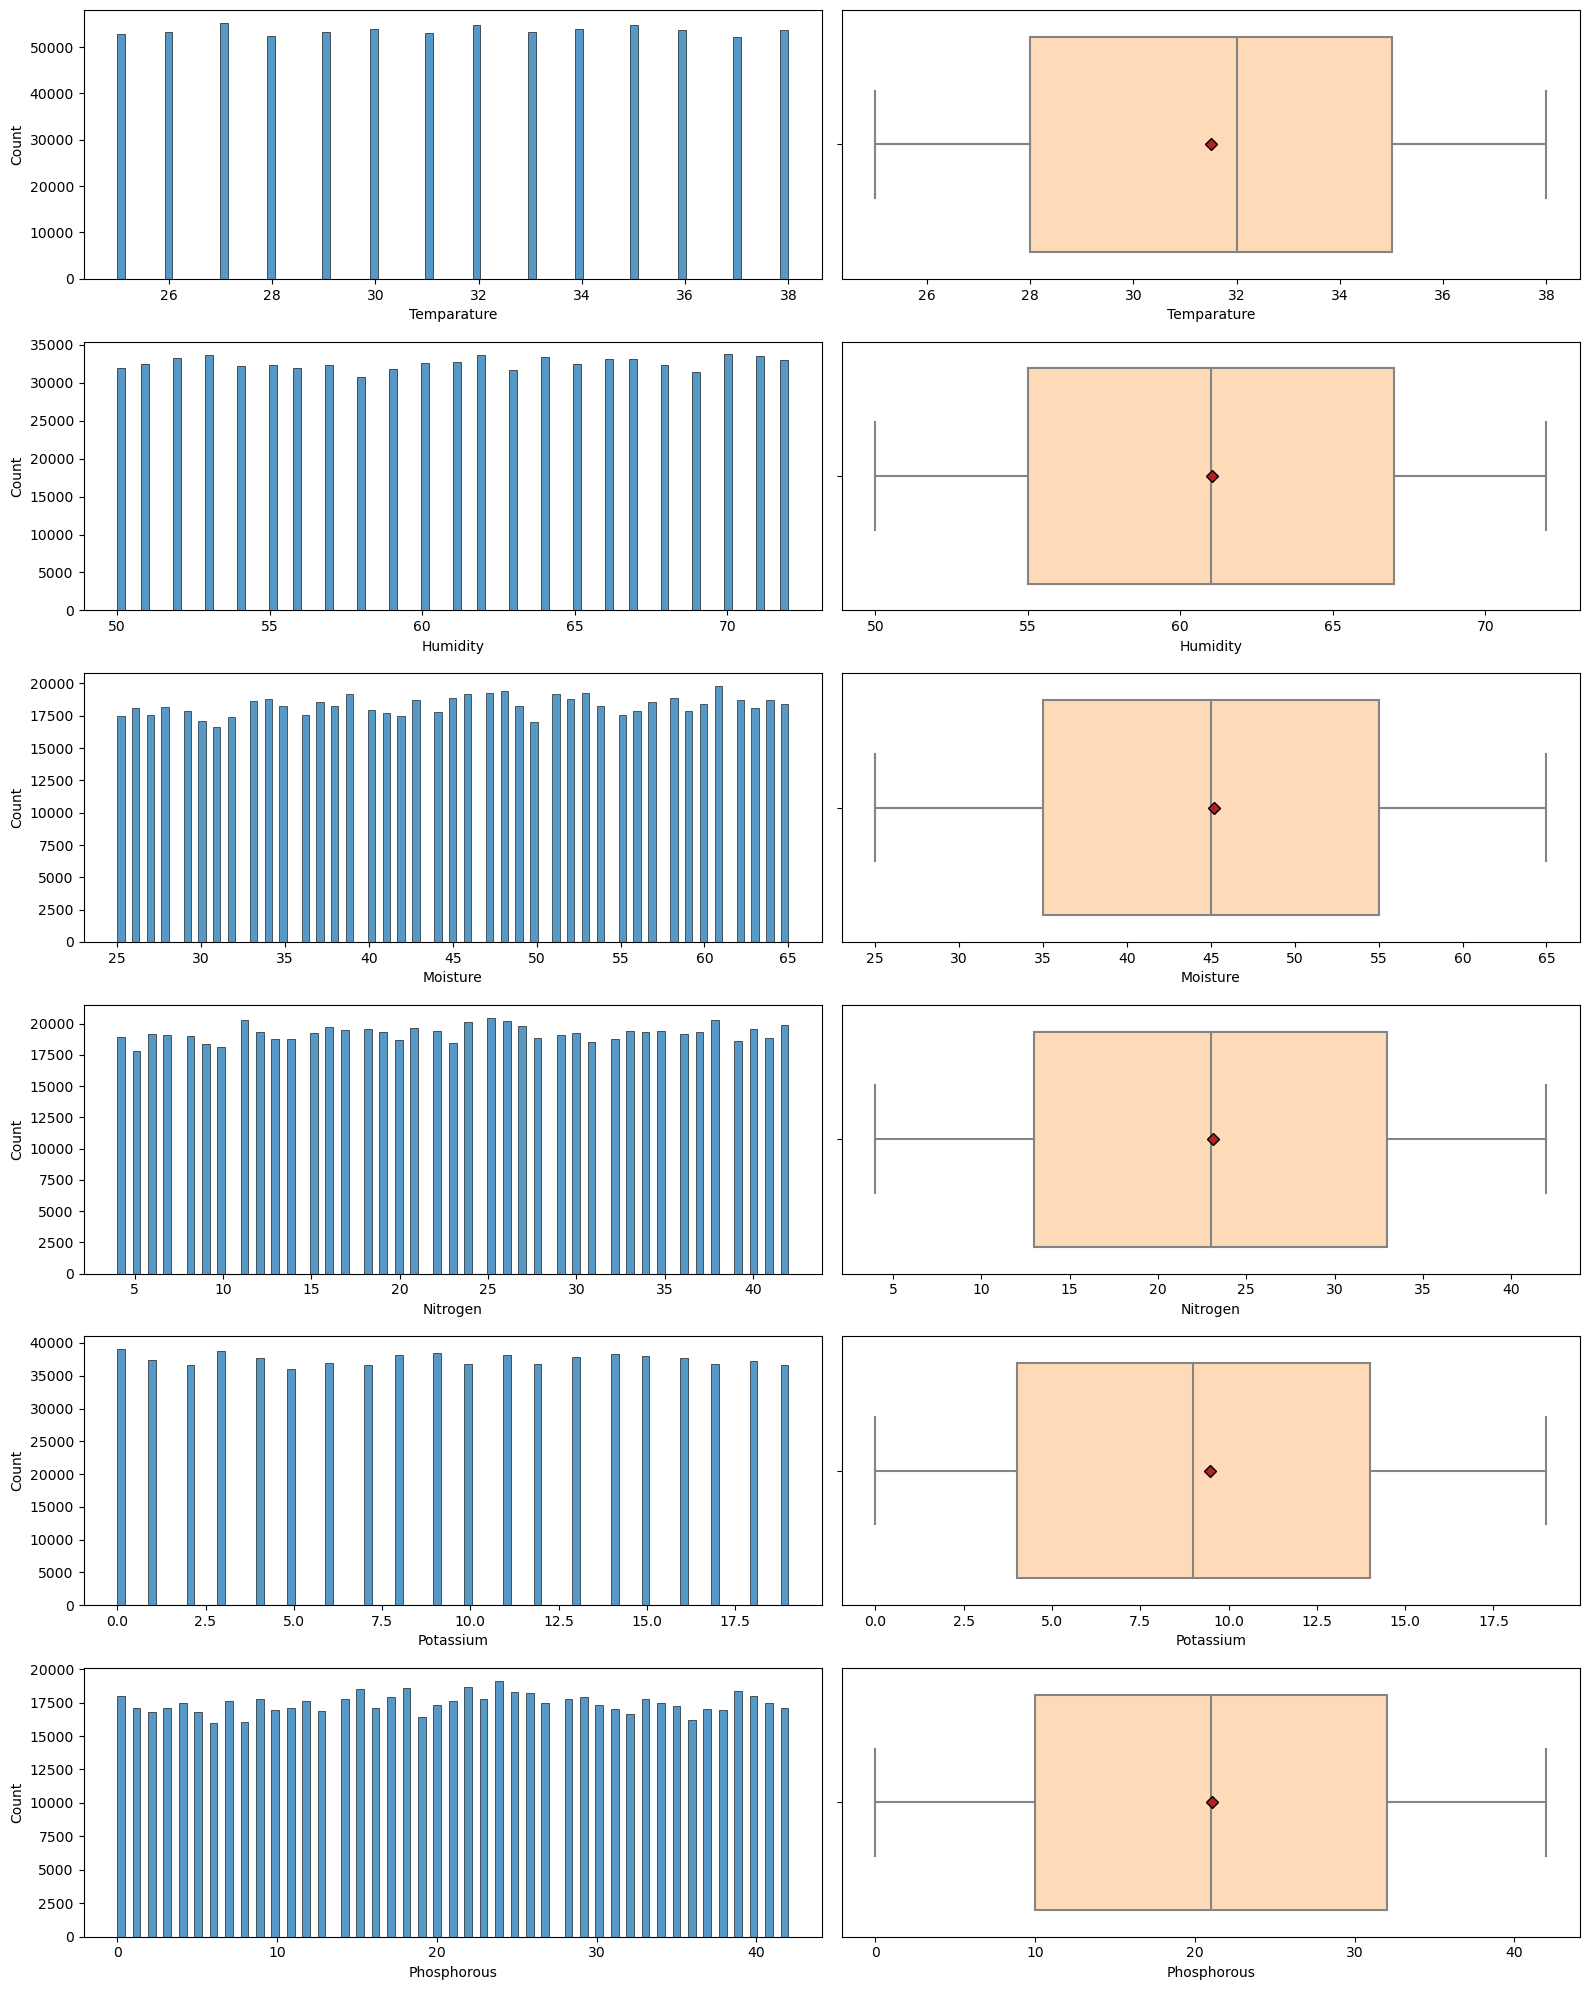

In [528]:
plt.figure(figsize=(16,20))

for idx,col in enumerate(var_cont):
    plt.subplot(6,2,idx*2+1)
    sns.histplot(data = train, x = col)
    plt.subplot(6,2,idx*2+2)
    sns.boxplot(data = train, x = col ,saturation = 1,
                color = "peachpuff",
                showmeans=True, 
            meanprops={"marker":"D","markeredgecolor":'black',
                      "markerfacecolor":'firebrick'} )

plt.tight_layout()
plt.show()

Malgrès que température ne prends que des valeurs discrètes dans ce jeu de donnée, on va quand meme la considérer comme feature continue, de même pour les autres feature decrivant les propriété physico chimique des sols

##### variable qualitatives :

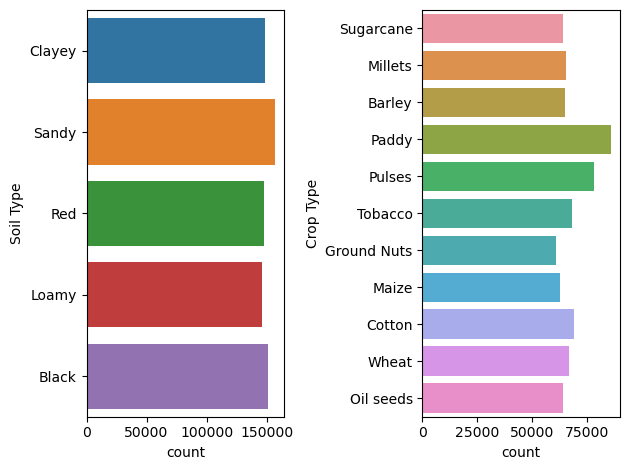

In [481]:
fig,axes = plt.subplots(1,2)
sns.countplot(y = var_qual[0], data=train, ax  = axes[0])
sns.countplot(y = var_qual[1], data=train, ax = axes[1])
plt.tight_layout()
plt.show()

## Analyse bivariée : relation entre 2 features
- Continue/continue : heatmap

#### Features continues / continues

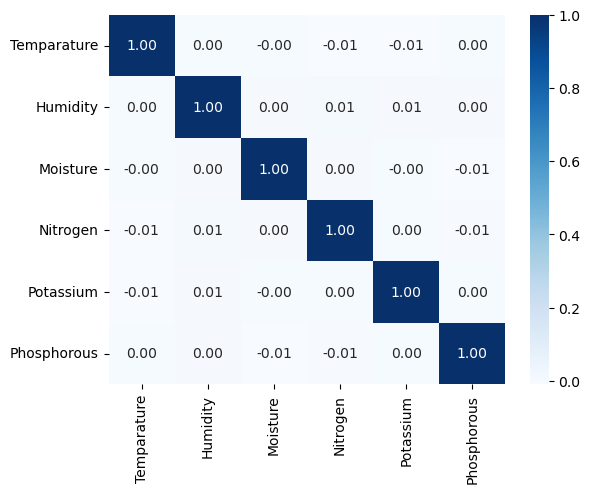

In [532]:
sns.heatmap(data = train[var_cont].corr(), fmt = ".2f", annot = True, cbar= True, cmap = "Blues")
plt.show()

#### observation : 
* pas de relation linéaire entre les variables continues, visuellement on ne voit pas de dépendance entre les variables

#### Features qualitatives vs qualitative (target) : barplot empilé

In [677]:
crosstab1 = pd.crosstab(train["Fertilizer Name"], train["Soil Type"], margins=False)
crosstab1
# ou écrire  :
# train.groupby(['Fertilizer Name', 'Soil Type']).size().unstack(fill_value=0)

Soil Type,Black,Clayey,Loamy,Red,Sandy
Fertilizer Name,,,,,
10-26-26,23061,23592,22822,21725,22687
14-35-14,23656,22258,22571,22779,23172
17-17-17,22304,22771,22249,22141,22988
20-20,21721,22508,22138,21614,22908
28-28,21196,22762,21522,21679,23999
DAP,20501,17278,17476,19077,20528
Urea,18517,17213,17072,19087,20428


In [830]:
crosstab2 = pd.crosstab(train["Crop Type"], train["Fertilizer Name"], margins=False)
crosstab2


Fertilizer Name,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
Crop Type,,,,,,,
Barley,9447,9809,9901,9500,9684,8068,8636
Cotton,10204,9953,10337,10013,9862,9427,9375
Ground Nuts,9087,9582,9468,9322,9715,6802,6933
Maize,9821,9546,8722,8615,9232,8289,8344
Millets,9300,10121,9494,9541,9916,8148,8771
Oil seeds,9838,10038,9058,9502,9902,8153,7693
Paddy,12812,12651,12661,11580,13264,11828,10958
Pulses,12090,13064,13138,12530,10761,8375,8222
Sugarcane,10399,10410,10003,10331,9902,6910,6314


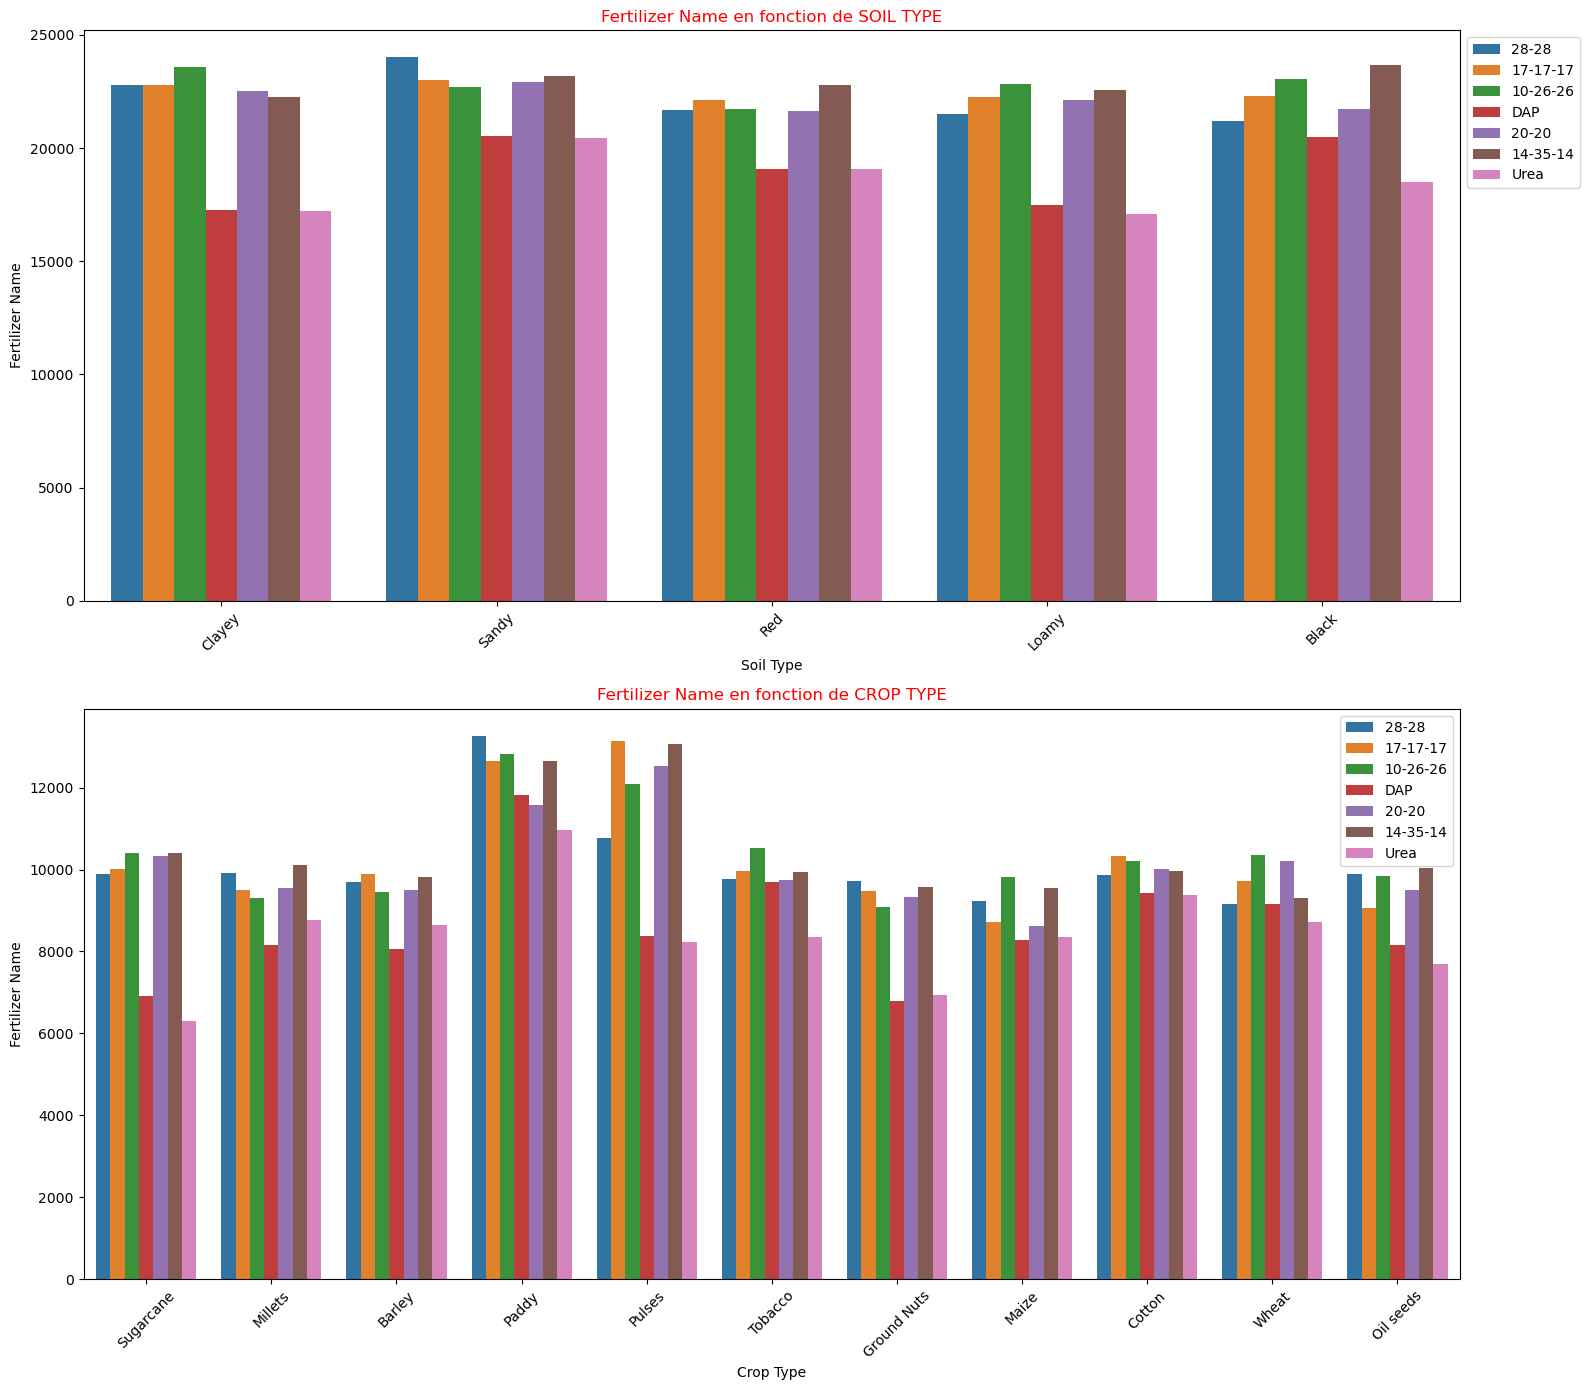

In [835]:
plt.figure(figsize=(16,14))
for i, col in enumerate(var_qual,1):
    if col != target:
        plt.subplot(2,1,i)
        
        #pour colorer : 
        unique_val = train[target].unique()
        palette = sns.color_palette("tab10", n_colors=len(unique_val)) #tab10 = couleur de base de seaborn
        dic_palette = dict(zip(unique_val, palette))
        
        sns.countplot(x=col, hue = target, data = train, palette=dic_palette)
        plt.legend(bbox_to_anchor=(1,1))
        plt.title(f'{target} en fonction de {col.upper()}', fontdict={"color":"red"})
        plt.ylabel(f"{target}")
        plt.xlabel(f'{col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- continue / discrète (ou qualitative)  : boxplot, violinplot, stripplot, barplot , swarmplot,..


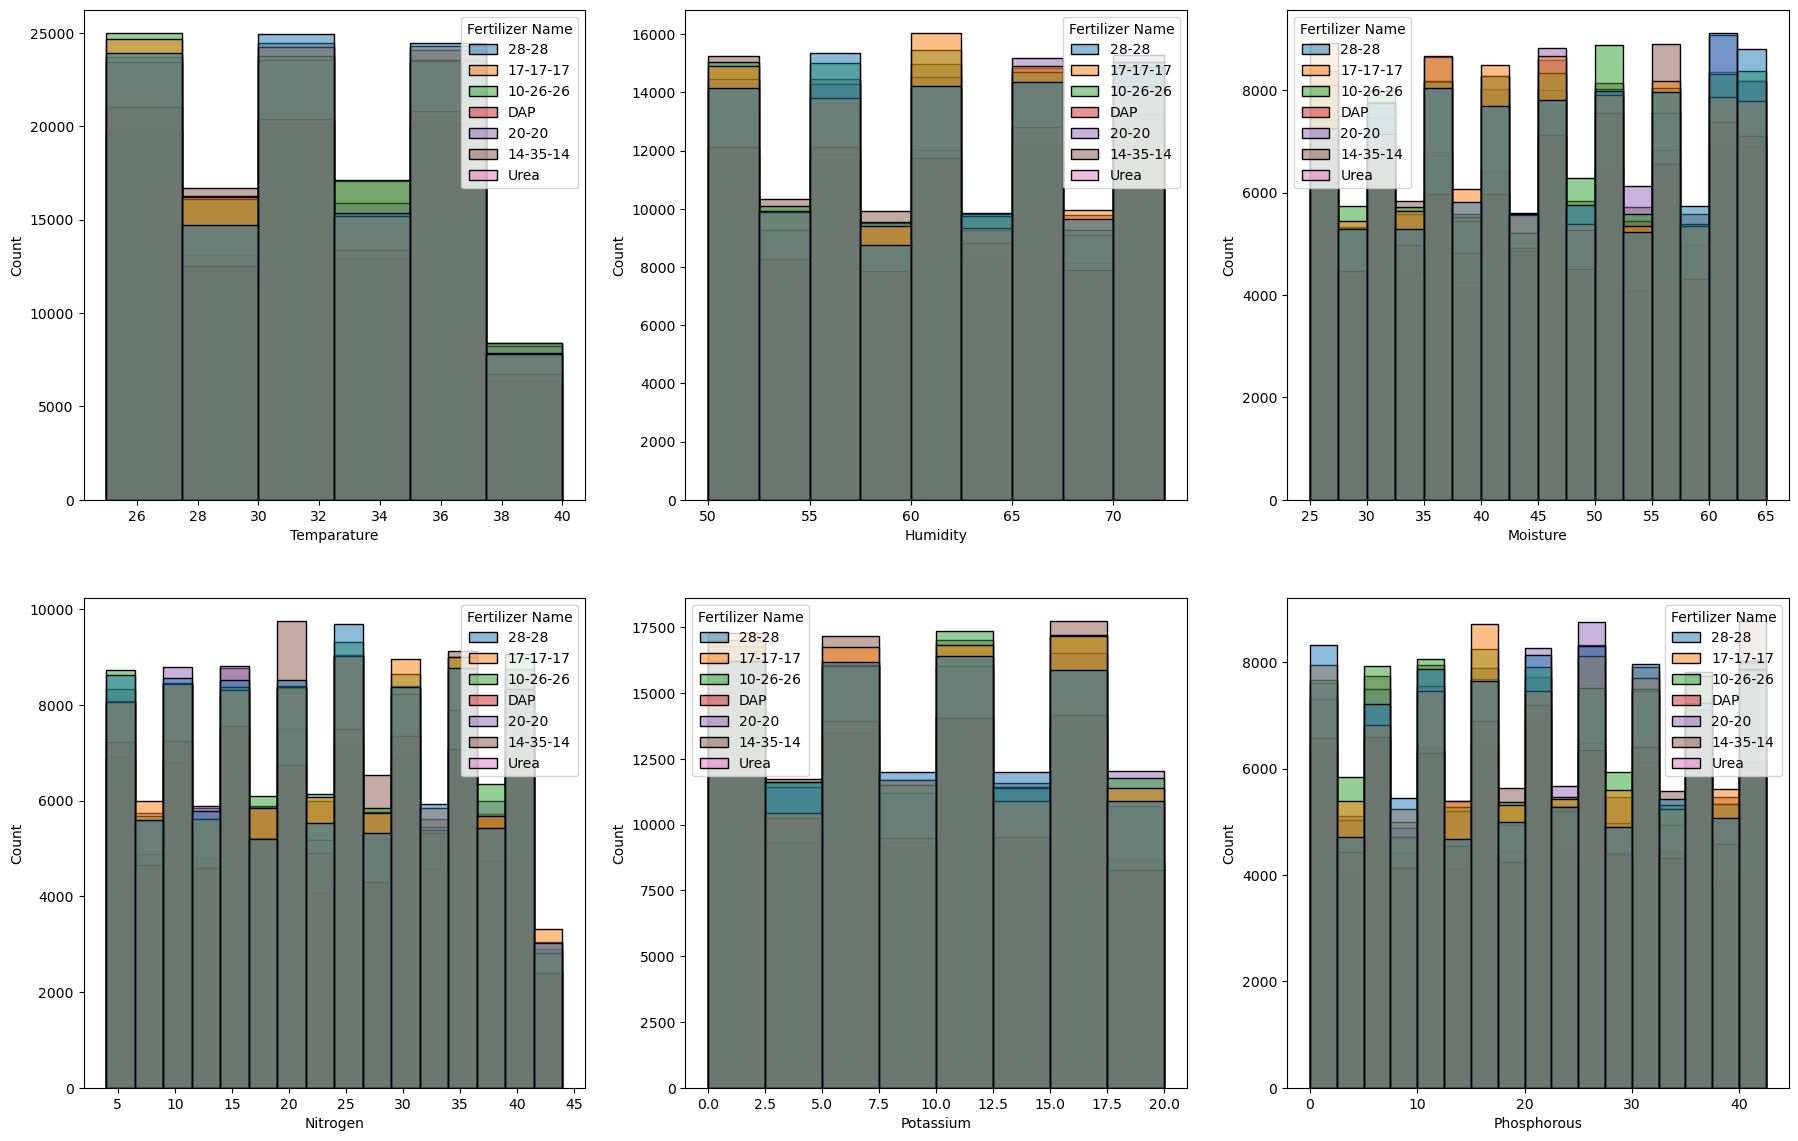

In [759]:
plt.figure(figsize=(22,14))

for i,col in enumerate(var_cont):
    plt.subplot(2,3,i+1)
    sns.histplot(data=train, x=col, hue=target, stat="count",binwidth=2.5)
# ax.legend(bbox_to_anchor=(1,1))
# plt.tight_layout()
plt.show()

In [825]:
stats_by_fertilizer = train.pivot_table(columns=target, values=var_cont, aggfunc=["mean","median","std"]).T
stats_by_fertilizer
#ou bien : 
# stats_by_fertilizer = train.groupby(target)[var_cont].agg(["mean","median","std"])
# stats_by_fertilizer

Humidity   Moisture   Nitrogen  Phosphorous  \
       Fertilizer Name                                                 
mean   10-26-26         60.937043  45.075856  23.202648    20.980885   
       14-35-14         60.962669  45.100047  23.083453    21.410221   
       17-17-17         60.998755  44.740345  23.205215    21.053934   
       20-20            61.104230  45.316713  23.008441    21.110633   
       28-28            61.013179  45.500297  23.013431    21.024821   
       DAP              61.155703  45.261944  23.155977    20.956051   
       Urea             61.140527  45.342743  22.972107    20.926666   
median 10-26-26         61.000000  45.000000  23.000000    21.000000   
       14-35-14         61.000000  45.000000  23.000000    22.000000   
       17-17-17         61.000000  45.000000  23.000000    21.000000   
       20-20            61.000000  45.000000  23.000000    21.000000   
       28-28            61.000000  46.000000  23.000000    21.000000   
       DAP              61.000000  46.000000  23.000000    21.000000   
       Urea             61.000000  46.000000  23.000000    21.000000   
std    10-26-26          6.640019  11.786084  11.244531    12.388746   
       14-35-14          6.641917  11.786555  11.106016    12.375613   
       17-17-17          6.612568  11.760048  11.191768    12.340902   
       20-20             6.661199  11.769782  11.253946    12.320987   
       28-28             6.654917  11.853618  11.231735    12.397456   
       DAP               6.674935  11.858084  11.274307    12.293027   
       Urea              6.650299  11.731911  11.219700    12.284100   

                        Potassium  Temparature  
       Fertilizer Name                          
mean   10-26-26          9.555138    31.470589  
       14-35-14          9.484568    31.543247  
       17-17-17          9.523899    31.463803  
       20-20             9.590329    31.514406  
       28-28             9.478220    31.518973  
       DAP               9.252878    31.508065  
       Urea              9.417323    31.507296  
median 10-26-26         10.000000    32.000000  
       14-35-14          9.000000    32.000000  
       17-17-17         10.000000    31.000000  
       20-20            10.000000    31.000000  
       28-28             9.000000    32.000000  
       DAP               9.000000    32.000000  
       Urea              9.000000    32.000000  
std    10-26-26          5.787646     4.038993  
       14-35-14          5.728002     4.001384  
       17-17-17          5.777925     4.030426  
       20-20             5.812375     4.025341  
       28-28             5.715701     4.029370  
       DAP               5.768208     4.051078  
       Urea              5.763855     4.001744

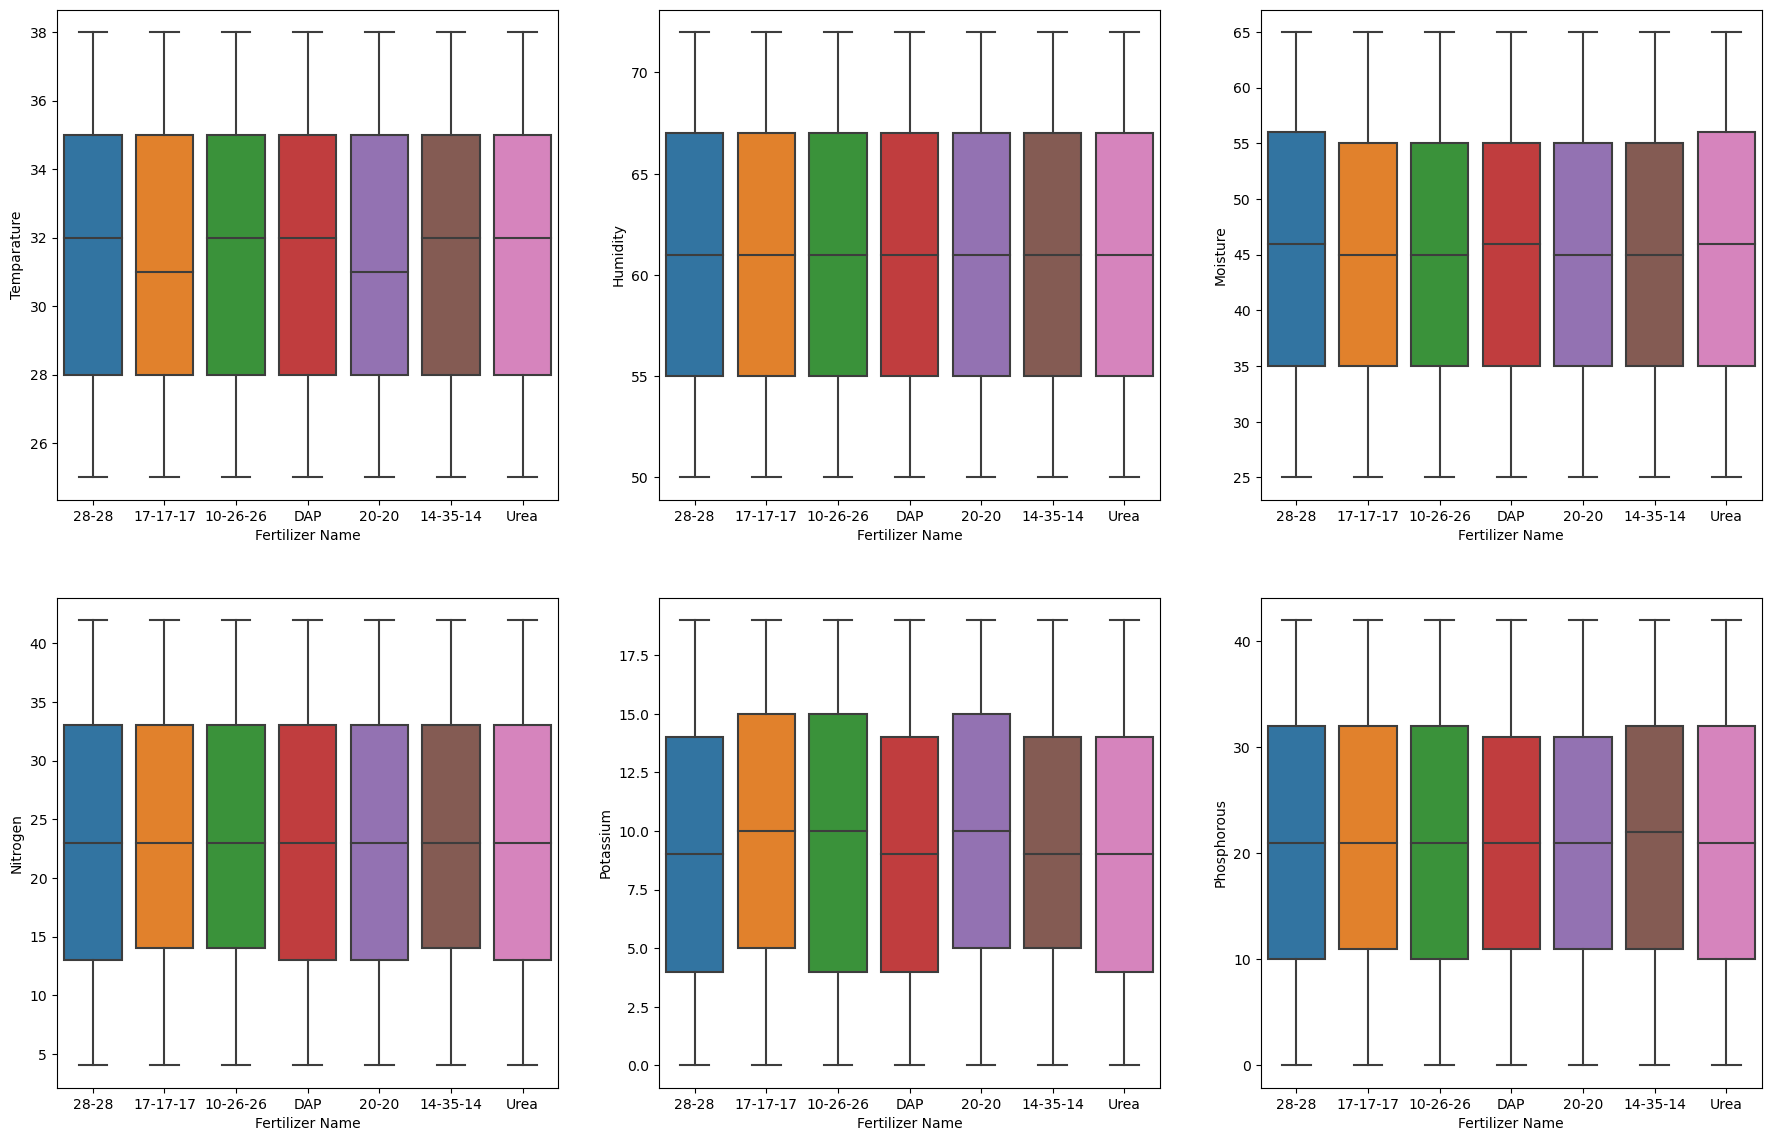

In [855]:
plt.figure(figsize=(22,14))
for i,col in enumerate(var_cont):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=train, y=col, x=target)
# ax.legend(bbox_to_anchor=(1,1))
# plt.tight_layout()
plt.show()

#### observation : 
- nitrogene&humidity : pas de variation de la médiane, variable indépendantes
- variation  avec temperature, potassium, Moisture 

regardons ces variables plus précisément

#### analyse multivariée 
##### scatterplot :

In [852]:
import plotly.express as px
from sklearn.model_selection import train_test_split

#
#  l'échantillon (fraction)
sample_fraction = 0.01  # 1%

# utilisons le train_test_split pour l'échantillonnage stratifié avec 'stratify' pour s'assurer
#que les proportions de 'Fertilizer Name' sont maintenues.

_, train_sampled_stratified = train_test_split(
    train,
    test_size=sample_fraction, # la taille de l'échantillon que vous voulez
    stratify=train["Fertilizer Name"], # la colonne a stratifier
    random_state=42
)

In [854]:
px.scatter_3d(x = "Temparature", y = "Moisture", z = "Potassium", 
              color="Fertilizer Name", data_frame = train_sampled_stratified)

- Pas de formation de cluster en fonction du nom du fertilisant

##### lmplot : 

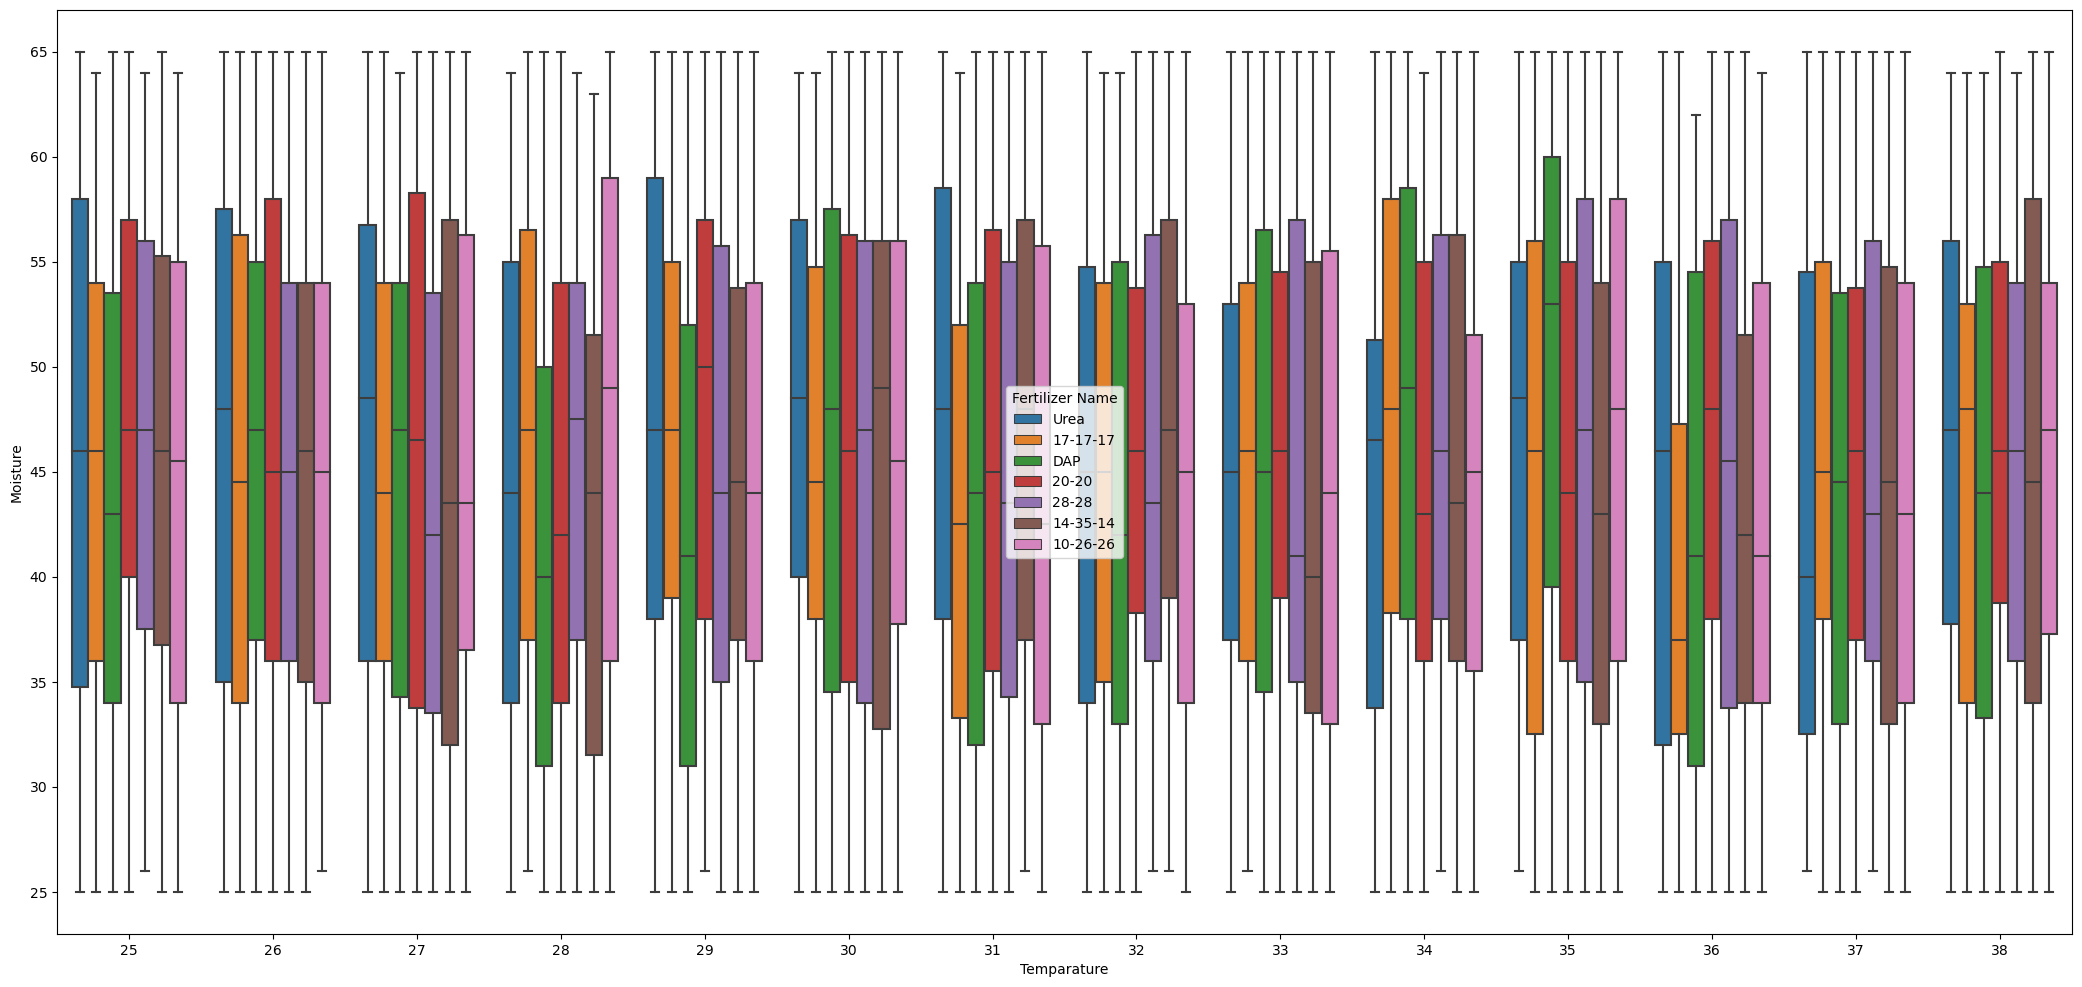

In [866]:
plt.figure(figsize=(26,12))
sns.boxplot(x="Temparature", y = "Moisture", hue = "Fertilizer Name", data = train_sampled_stratified)
plt.show()

## Preprocessing :
- Données continues : normalisation 
    - StandardScaler :  données ont une moyenne = 0 & std = 1
	- MinMaxScaler : transforme les données pour arriver dans une plage (0,1)
	- RobustScaler : données avec beaucoup d'outliers
- qualitatives :
	- ordinale : ordinalencoder/labelencoder
	- nominal : onehotencoder

In [906]:
#### Séparation des données : 
X,y = train.drop(target,axis=1), train[target]
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify = y, test_size=.2)

##### Standardisation :

In [907]:
std = StandardScaler()
std.fit(X_train[var_cont])
X_std = std.transform(X[var_cont])
X[var_cont] = X_std

<IPython.core.display.Javascript object>

#### Encodage :

##### Encodage des features

In [892]:
for col in X_train.select_dtypes("object"):
    print(col)

Soil Type
Crop Type


In [927]:
var_qual_feat = [i for i in var_qual if i != target]

In [929]:
feature_encoder = {}

for column in var_qual_feat:
    feature_encoder[column]=LabelEncoder()
    feature_encoder[column].fit(X_train[column].astype(str))
    X[column]=feature_encoder[column].transform(X[column])
print(feature_encoder)
X[var_qual_feat].head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'Soil Type': LabelEncoder(), 'Crop Type': LabelEncoder()}


,Soil Type,Crop Type
0,1,8
1,4,4
2,4,4
3,4,0
4,3,6


##### Encodage target :

In [931]:
target_encoder = LabelEncoder()
target_encoder.fit(y_train.astype(str))

<IPython.core.display.Javascript object>

LabelEncoder()

In [963]:
y = pd.Series(target_encoder.transform(y),name=target)
y

0         4
1         4
2         2
3         0
4         5
         ..
749995    4
749996    2
749997    0
749998    3
749999    6
Name: Fertilizer Name, Length: 750000, dtype: int32

In [969]:
train_preprocessed =  pd.concat([X,y],axis=1)

## Enregistrement : 

In [1029]:
def save_file(name, file_save):
    file_path = f"{name}.pkl"
    with open(file_path,"wb") as f:
        pickle.dump(file_save, f)
    print(f'{colored(name,"red")} enregistré sous {colored(os.getcwd()+"/","green")}')


In [1030]:
save_file("TargetEncoder", target_encoder)
save_file("feature_encoder", feature_encoder)
save_file("StandardScaler", std)


<IPython.core.display.Javascript object>

TargetEncoder enregistré sous D:\etude_data_science\Kaggle_competition\16_Predicting_Optimal_Fertilizers\notebook/


<IPython.core.display.Javascript object>

feature_encoder enregistré sous D:\etude_data_science\Kaggle_competition\16_Predicting_Optimal_Fertilizers\notebook/


<IPython.core.display.Javascript object>

StandardScaler enregistré sous D:\etude_data_science\Kaggle_competition\16_Predicting_Optimal_Fertilizers\notebook/


In [1049]:
train_preprocessed.to_csv("train_preprocessed.csv")